In [1]:
import pandas as pd
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# # font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
# import pydot

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score

from sklearn.metrics import confusion_matrix

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

# 가설검정, 분산분석하는 패키지
from statsmodels.formula.api import ols # 분산분석하기? 모델링?
from statsmodels.stats.anova import anova_lm # 아노바 데이터프레임 형태 출력
from scipy.stats import shapiro
%matplotlib inline
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

# # font_path = 'C:/Windows/Fonts/gulim.ttc'
# font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)

from matplotlib import font_manager,rc

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.api import qqplot, add_constant

# from sklearn.tree import export_graphviz
# import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df_request = pd.read_csv('new_request.csv',encoding='euckr')
df_request.isna().sum()

Unnamed: 0                0
customer_id               0
review_cat                0
judge                     0
gender                    0
age                       0
insu_id                   0
insu_contract_date        0
insu_prod_id              0
insu_prod_name            0
req_id                    0
req_id_seq                0
sick_main                 0
sick_1st                  0
sick_2nd              37667
sick_3rd              44233
dg_cat                    0
dg_start_date             0
dg_end_date               0
dg_duration               0
insu_req_amount           0
insu_pay_amount           0
insu_pay_date             0
insu_duration             0
insu_cum_amount           0
dtype: int64

In [3]:
set1 = df_request.groupby(['customer_id','req_id'])[['insu_req_amount']].sum()
set1 = set1.groupby('customer_id')[['insu_req_amount']].sum()
set2 = df_request.groupby(['customer_id','req_id'])[['insu_pay_amount']].mean()
set2 = set2.groupby('customer_id')[['insu_pay_amount']].sum()

set3 = pd.merge(set1,set2,on='customer_id')

set3 # 고객 id 당 총 청구, 납입액 확인하기

,insu_req_amount,insu_pay_amount
customer_id,,
C112379,623098,1214577.0
C112404,808750,1008750.0
C112411,333680,553680.0
C112570,2762279,2852279.0
C112727,201880,201880.0
...,...,...
C134197,1891048,1901048.0
C134221,6281720,9951053.0
C134227,262028,262028.0


In [4]:
test_1 = set3[set3['insu_req_amount']!=0] # 총 청구금액이 0이 아닌 고객
test_2 = set3[set3['insu_req_amount']==0] # 총 청구 금액이 0인 고객

# 고객 분류

- 총 청구 금액이 0인 고객 : 지급액만 비교
- 총 청구 금액이 0이 아닌 고객 : 청구 대비 지급이 된 비율로 분류
    
## (설명)

- 청구 - 지급 = 본인 부담액, Ratio = 본인 부담액 / 총 청구액
- 총 청구액 대비 본인이 얼마나 부담했는지 비율로 확인, 본인 부담액이 청구의 10% 이상인 경우, 수익 고객으로 분류

- 청구 = 0인 경우, 비율 확인 불가, 최빈값 = 중앙값보다 적은 돈을 수령받은 고객을
수익성 고객이라 판단

### 청구가 0이 아닌 고객 분류, Ratio 사용

In [5]:
test_1['dif_amount'] = test_1['insu_req_amount']-test_1['insu_pay_amount']
test_1['ratio'] = test_1['dif_amount']/test_1['insu_req_amount']

test_1.head()

<ipython-input-5-8d47c534b725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['dif_amount'] = test_1['insu_req_amount']-test_1['insu_pay_amount']
<ipython-input-5-8d47c534b725>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['ratio'] = test_1['dif_amount']/test_1['insu_req_amount']


,insu_req_amount,insu_pay_amount,dif_amount,ratio
customer_id,,,,
C112379,623098,1214577.0,-591479.0,-0.949255
C112404,808750,1008750.0,-200000.0,-0.247295
C112411,333680,553680.0,-220000.0,-0.659314
C112570,2762279,2852279.0,-90000.0,-0.032582
C112727,201880,201880.0,0.0,0.000000


#### ratio 분포 확인

- ratio가 음수 : 과지급, 위험 고객 분류
- ratio가 양수인 경우 데이터 분포 확인 : histogram

In [6]:
test_1.describe()

,insu_req_amount,insu_pay_amount,dif_amount,ratio
count,4.043000e+03,4.043000e+03,4.043000e+03,4043.000000
mean,1.046288e+06,1.457213e+06,-4.109248e+05,-1.037116
std,1.516648e+06,3.401177e+06,2.932747e+06,10.765502
min,7.000000e+02,7.000000e+02,-7.000000e+07,-500.000000
25%,2.000000e+05,2.499595e+05,-2.000000e+05,-0.252049
50%,4.931900e+05,6.060500e+05,0.000000e+00,0.000000
75%,1.262550e+06,1.467768e+06,0.000000e+00,0.000000
max,1.710679e+07,7.025000e+07,6.947112e+06,0.869538


<AxesSubplot:>

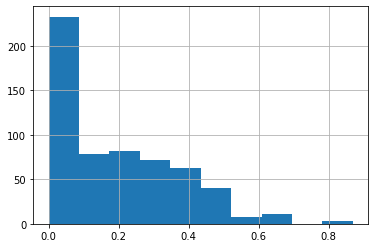

In [7]:
tmp = test_1[test_1['ratio'] > 0]
tmp['ratio'].hist()

본인 부담률 0.1를 기준으로 데이터 분포의 차이 확인 가능

- 따라서, 0.1 이전 고객을 위험 고객, 0.1 이후 고객을 수익 고객으로 분류 결정

In [8]:
test_1['risk'] = np.where(test_1['ratio']<0.1,1,0) # 본인 부담이 10% 이하 고객 -> 손실 risk 할당
test_1

<ipython-input-8-76a575b5f784>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['risk'] = np.where(test_1['ratio']<0.1,1,0) # 본인 부담이 10% 이하 고객 -> 손실 risk 할당


,insu_req_amount,insu_pay_amount,dif_amount,ratio,risk
customer_id,,,,,
C112379,623098,1214577.0,-591479.0,-0.949255,1
C112404,808750,1008750.0,-200000.0,-0.247295,1
C112411,333680,553680.0,-220000.0,-0.659314,1
C112570,2762279,2852279.0,-90000.0,-0.032582,1
C112727,201880,201880.0,0.0,0.000000,1
...,...,...,...,...,...
C134197,1891048,1901048.0,-10000.0,-0.005288,1
C134221,6281720,9951053.0,-3669333.0,-0.584129,1
C134227,262028,262028.0,0.0,0.000000,1


In [9]:
test_1.groupby('risk').count()

,insu_req_amount,insu_pay_amount,dif_amount,ratio
risk,,,,
0,348,348,348,348
1,3695,3695,3695,3695


위험 고객의 10%의 비율로 수익 고객 할당

### 청구가 0인 고객 분류, median 사용

In [10]:
test_2[['insu_pay_amount']].describe()

,insu_pay_amount
count,4.770000e+02
mean,1.133858e+06
std,6.486067e+06
min,3.000000e+04
25%,2.000000e+05
50%,2.000000e+05
75%,4.000000e+05
max,1.000000e+08


<AxesSubplot:>

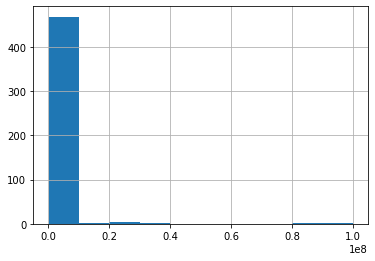

In [11]:
test_2['insu_pay_amount'].hist()

<AxesSubplot:>

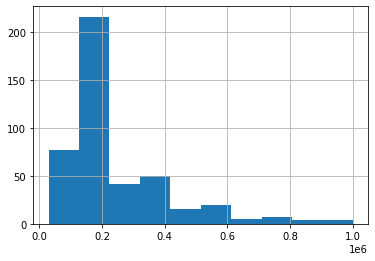

In [12]:
tmp_2 = test_2[test_2['insu_pay_amount'] <= 1000000]
tmp_2['insu_pay_amount'].hist()

# 20만원을 기점으로 데이터 분포 차이 확인 가능, 20만원 미만 수익 고객 분류

In [13]:
test_2['risk'] = np.where(test_2['insu_pay_amount']<test_2['insu_pay_amount'].median(),0,1)
test_2.groupby('risk').count()

<ipython-input-13-a978d0b2cd66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2['risk'] = np.where(test_2['insu_pay_amount']<test_2['insu_pay_amount'].median(),0,1)


,insu_req_amount,insu_pay_amount
risk,,
0,93,93
1,384,384


위험 고객의 25% 비율을 수익 고객으로 할당
- 중앙값 미만이 수익인 이유 : 가장 흔하게 지급받는 돈보다 더 적은 돈을 지급

## 1분류 데이터 병합

In [14]:
test = pd.concat([test_1,test_2])
test = test.reset_index()
join_1 = test[['customer_id','risk']]
join_1

,customer_id,risk
0,C112379,1
1,C112404,1
2,C112411,1
3,C112570,1
4,C112727,1
...,...,...
4515,C132759,1
4516,C132821,1
4517,C132957,0
4518,C133351,1


In [15]:
join_1.groupby('risk').count()

,customer_id
risk,
0,441
1,4079


## 총 수익 추정치

In [16]:
t1 = df_request.groupby(['customer_id'])[['insu_cum_amount','insu_duration']].max()

In [17]:
t1['cum_month'] = t1['insu_cum_amount'] / t1['insu_duration']
t1

,insu_cum_amount,insu_duration,cum_month
customer_id,,,
C112379,1800000,15,120000.0
C112404,600000,5,120000.0
C112411,240000,2,120000.0
C112570,4875000,39,125000.0
C112727,3250000,26,125000.0
...,...,...,...
C134197,4000000,40,100000.0
C134221,3600000,36,100000.0
C134227,1100000,11,100000.0


In [18]:
df_c = pd.merge(t1,join_1,on='customer_id')
df_c[df_c['risk'] == 0].describe() # 수익 고객으로 분류된 기존 가입자의 요약 통계량
# 평균 월 181453원 납입

,insu_cum_amount,insu_duration,cum_month,risk
count,4.410000e+02,441.000000,440.000000,441.0
mean,5.344830e+06,29.061224,181177.116373,0.0
std,3.358228e+06,11.189824,86246.843097,0.0
min,0.000000e+00,0.000000,30000.000000,0.0
25%,2.100000e+06,23.000000,100000.000000,0.0
50%,5.280000e+06,33.000000,220000.000000,0.0
75%,7.700000e+06,37.000000,220000.000000,0.0
max,1.600000e+07,48.000000,400000.000000,0.0


- risk 1 고객 4079명은 2분류로 이동, 저위험과 고위험으로 분리
- risk 0 고객은 수익 고객으로 분류, 441

In [19]:
# 데이터 내보내기

join_1.to_csv('join_1.csv',encoding='euckr')

### 2분류 데이터 생성

Boxplot 밖 Data 분포로 분류, 저위험, 고위험 분류

- 저위험을 할증, 고위험을 거절 유지

### 청구가 0이 아닌 고객

In [20]:
def IQR_L(df,col) :
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    IQR_L = Q1-1.5*IQR
    return IQR_L

def IQR_H(df,col) :
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    IQR_H = Q3+1.5*IQR
    return IQR_H

In [21]:
next_1 = test_1[test_1['risk']==1]
next_1

,insu_req_amount,insu_pay_amount,dif_amount,ratio,risk
customer_id,,,,,
C112379,623098,1214577.0,-591479.0,-0.949255,1
C112404,808750,1008750.0,-200000.0,-0.247295,1
C112411,333680,553680.0,-220000.0,-0.659314,1
C112570,2762279,2852279.0,-90000.0,-0.032582,1
C112727,201880,201880.0,0.0,0.000000,1
...,...,...,...,...,...
C134197,1891048,1901048.0,-10000.0,-0.005288,1
C134221,6281720,9951053.0,-3669333.0,-0.584129,1
C134227,262028,262028.0,0.0,0.000000,1


<AxesSubplot:>

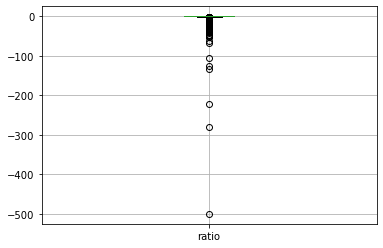

In [22]:
next_1[['ratio']].boxplot()

- ratio 본인 부담액 : 작을수록 손해가 크다.
- 아래쪽 IQR 밖으로 벗어나면 관리할 수 없다고 판단, 거절

In [23]:
next_1['n_risk'] = np.where(next_1['ratio'] < IQR_L(next_1,'ratio'),1,0)

<ipython-input-23-b8e7abb95984>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_1['n_risk'] = np.where(next_1['ratio'] < IQR_L(next_1,'ratio'),1,0)


In [24]:
next_1.groupby('n_risk').count()

,insu_req_amount,insu_pay_amount,dif_amount,ratio,risk
n_risk,,,,,
0,3130,3130,3130,3130,3130
1,565,565,565,565,565


### 청구가 0인 고객

In [25]:
next_2 = test_2[test_2['risk']==1]
next_2

,insu_req_amount,insu_pay_amount,risk
customer_id,,,
C112899,0,5000000.0,1
C112928,0,200000.0,1
C112966,0,200000.0,1
C112986,0,200000.0,1
C113069,0,200000.0,1
...,...,...,...
C132650,0,200000.0,1
C132759,0,1200000.0,1
C132821,0,200000.0,1


<AxesSubplot:>

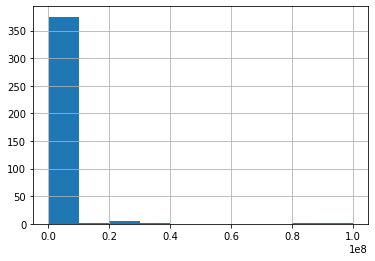

In [26]:
next_2['insu_pay_amount'].hist()

<AxesSubplot:>

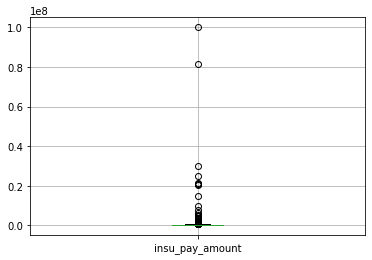

In [27]:
next_2[['insu_pay_amount']].boxplot()

In [28]:
next_2['n_risk'] = np.where(next_2['insu_pay_amount'] > IQR_H(next_2,'insu_pay_amount'),1,0)

<ipython-input-28-c97c09376173>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_2['n_risk'] = np.where(next_2['insu_pay_amount'] > IQR_H(next_2,'insu_pay_amount'),1,0)


In [29]:
next_2.groupby('n_risk').count()

,insu_req_amount,insu_pay_amount,risk
n_risk,,,
0,331,331,331
1,53,53,53


In [30]:
join_2 = pd.concat([next_1,next_2])
join_2 = join_2.reset_index()

In [31]:
join_2 = join_2[['customer_id','n_risk']]

In [32]:
join_2

,customer_id,n_risk
0,C112379,1
1,C112404,0
2,C112411,0
3,C112570,0
4,C112727,0
...,...,...
4074,C132650,0
4075,C132759,1
4076,C132821,0
4077,C133351,0


In [33]:
# 2분류 데이터 내보내기

join_2.to_csv('join_2.csv',encoding = 'euckr')

## 최종 청구 기준 last 분류

In [34]:
tmp = join_1[join_1['risk'] == 0]
tmp

,customer_id,risk
16,C112937,0
42,C113088,0
46,C113112,0
51,C113162,0
55,C113176,0
...,...,...
4504,C132153,0
4505,C132156,0
4512,C132515,0
4513,C132546,0


In [35]:
join_2['risk'] = np.where(join_2['n_risk'] == 0,1,2)
join_2 = join_2.drop('n_risk',axis=1)
join_2

,customer_id,risk
0,C112379,2
1,C112404,1
2,C112411,1
3,C112570,1
4,C112727,1
...,...,...
4074,C132650,1
4075,C132759,2
4076,C132821,1
4077,C133351,1


In [36]:
pd.concat([tmp,join_2]).to_csv('req_target.csv',encoding='euckr')

In [37]:
pd.concat([tmp,join_2]).groupby('risk').count()

,customer_id
risk,
0,441
1,3461
2,618
